# DAY 15: Deep Learning for Image Data

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: You do not need to submit this notebook, this is meant to help you get started on Homework #2.


**First name**: _________________________________________________________


**Last name**: _____________

## Learning Goals:

1. train a convolutional neural network
2. deal with real image dataset
3. deal with class imbalance

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pylab as plt

Using TensorFlow backend.


# Detecting Illegal Coffee Plantations and Deforestation 

> From mountainous jungles to low-lying dry forests, people are utilizing and accessing the forests of the Greater Mekong like never before. As recently as the early 70s, forests blanketed three quarters of the Greater Mekong. The last 30 years have seen more than 30% of that forest cover disappear. 

> Farmers are clearing forest cover for coffee planations at an accelerating pace. 

> Forests landscapes and river systems in the Greater Mekong region are becoming increasingly fragmented. The remaining intact areas are increasingly smaller and isolated inside areas that have been heavily transformed.

> This can make it difficult for some animals to find suitable habitat or to follow usual migration routes. It can also increase inbreeding, which in turn can increase the vulnerability of species to disease and other pressures.

> When habitats are isolated, species also become more vulnerable to climate change, as their ability to move to areas with more favourable conditions becomes increasingly limited. *-- WWF*

Since illegal coffee plantations are often located deep in the forest, they are difficult to detect. Therefore, satellite images are now being used to detect these planations. However, there are vast numbers of satellite images being collected and it is both expensive and inefficient to process these images using human experts. 

Your job today is to build a machine learning model that can automatically detect the presence of a coffee plantation in a satellite image. You are provided with a small training set of labeled images (the label is 1 if there is a coffee planation in the image, and the label is 0 if there is not). 


Here are some examples of images that do not contain coffee plantations:

<table>
<tr>
<td>
<img src="https://i.ibb.co/DCm67tn/neg1.jpg" alt="neg1" border="0">
</td>
<td>
<img src="https://i.ibb.co/PNgtKm5/neg2.jpg" alt="neg2" border="0">
</td>
<td>
<img src="https://i.ibb.co/JCrwV9B/neg3.jpg" alt="neg3" border="0">
</td>
<td>
<img src="https://i.ibb.co/1dJLg8m/neg4.jpg" alt="neg4" border="0">
</td>
</tr>
</table>

Here are some examples of images that contains coffee plantations:

<table>
<tr>
<td>
<img src="https://i.ibb.co/tDGMTDg/pos1.jpg" alt="pos1" border="0">
</td>
<td>
<img src="https://i.ibb.co/C7kDdw7/pos2.jpg" alt="pos2" border="0">
</td>
<td>
<img src="https://i.ibb.co/N6ZK4sp/pos3.jpg" alt="pos3" border="0">
</td>
<td>
<img src="https://i.ibb.co/9vjyTMS/pos4.jpg" alt="pos4" border="0">
</td>
</tr>
</table>

Today you will explore how to use Neural Network Classifiers to detect coffee plantations in satellite images.

### Read in the data and visualize

Since the satellite images are very high resolution and in color (i.e. each image is represented as three color matrices, red, green and blue), we have reduced the resolution and have converted the colors into gray-scale.

**Exercise 1:** Visualize several different images from the dataset to get familiar with the dataset.

In [ ]:
# Read-in the data
X = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/X_train.txt')
y = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/y_train.txt')

# Reshape the X's to have the correct dimensionality
X = X.reshape(X.shape[0], 20, 20)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

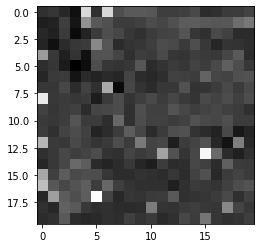

In [ ]:
# Visualize some example images
image_number = 0
plt.imshow(X[image_number], cmap='gray')
plt.show()

**Exercise 2:** Visualize the proportion of classes in the dataset. Is this dataset balanced? How might the balance of the classes in the data affect your classifier?

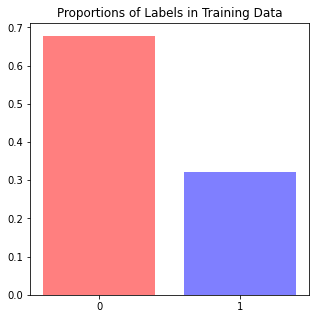

In [ ]:
# Make a bar chart showing the proportions of 0 labels and 1 labels in the training set
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Percentage of training data labeled 0
percent_0 = len(y_train[y_train == 0]) * 1. / len(y_train)
# Percentage of training data labeled 1
percent_1 = len(y_train[y_train == 1]) * 1. / len(y_train)
# Plot percentages in a bar plot
ax.bar((0, 1), (percent_0, percent_1), color=['red', 'blue'], alpha=0.5, align='center')
# Prettify the plot
ax.set_xticks([0, 1])
ax.set_title('Proportions of Labels in Training Data')
plt.show()

## Train a Neural Network Classifier

We first train a neural network classifier on the data.

**Exercise 3:** Experiment with the number of hidden layers and the number of hidden units in each layer of this neural network. Evaluate your classifier's AUC and confusion matrix. How does a normal neural network classifier do on this image dataset?

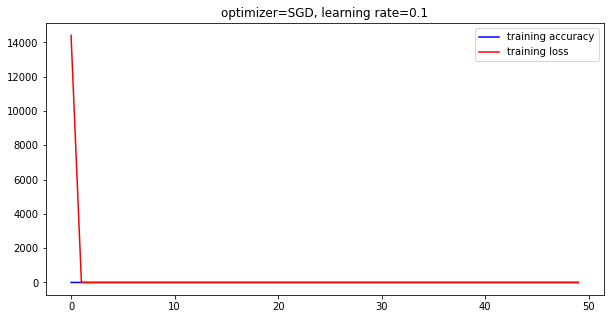

In [ ]:
# Step 1: Build a MLP with one hidden layer
dnn_model = Sequential()

# Step 2: add layer 0
dnn_model.add(Dense(100, input_shape=(X_train.shape[-2] * X_train.shape[-1],), activation='relu'))

# step 3: add single output for binary classification
dnn_model.add(Dense(1, activation='sigmoid'))

# Step 4: select Optimization parameters
lr = 0.1 # learning rate
epochs = 50 # total epochs

# Step 5: Compile the model
dnn_model.compile(optimizer=SGD(lr=lr, ), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the neural network
history = dnn_model.fit(X_train.reshape((X_train.shape[0], -1)), y_train, batch_size=150, shuffle=True, epochs=epochs, verbose=0)

# Step 7: Visualize metrics over course of training
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.array(history.history['accuracy']), color='blue', label='training accuracy')
ax.plot(np.array(history.history['loss']), color='red', label='training loss')
ax.set_title('optimizer={}, learning rate={}'.format('SGD', lr))
ax.legend(loc='upper right')
plt.show()

In [ ]:
# Step 1: make prediction on test data
y_pred = dnn_model.predict(X_test.reshape(X_test.shape[0], -1))

# Step 2: threthold the output probabilities
y_pred = (y_pred >= 0.5) * 1.0

# Step 3: print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Step 4: print AUC:
print('\nAUC Score:', roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[305   2]
 [169   0]]

AUC Score: 0.496742671009772


## Train a Convolutional Neural Network Classifier

**Exercise 4:** Experiment with the number of hidden layers and the number of hidden units of this convolutional neural network. Evaluate your classifier's AUC and confusion matrix. How does a CNN classifier do on this image dataset? Is the CNN classifier better at this task than the normal neural network classifier?

In [ ]:
# Construct a Convolutional Neural Network

# Step 1: Set the stride size
stride_size = (2, 2)

# Step 2: Set the pool size
pool_size = (2, 2)

# Step 3: define a sequential object
cnn_model = Sequential()

# Step 4: add a convolutional layer 
cnn_model.add(
    Conv2D(5, kernel_size=5, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))
# Step 5: add a max pooling layer
cnn_model.add(MaxPooling2D(pool_size=pool_size, strides=stride_size))

# Step 6: flatten
cnn_model.add(Flatten())

# Step 7: add a dense layer
cnn_model.add(Dense(50, activation='tanh'))

# Step 8: use sigmoid activation to output a probability
cnn_model.add(Dense(1, activation='sigmoid'))

# Step 8: select the learning rate
lr = 0.01

# Step 10: Compile model 
cnn_model.compile(optimizer=SGD(lr=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Fit the model
history = cnn_model.fit(np.expand_dims(X_train, axis=-1), y_train, batch_size=150, epochs=100, verbose=0)

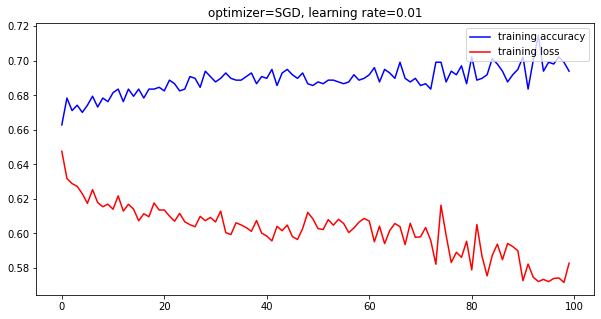

In [ ]:
# Plot the loss function and the evaluation metric over the course of training
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.array(history.history['accuracy']), color='blue', label='training accuracy')
ax.plot(np.array(history.history['loss']), color='red', label='training loss')
ax.set_title('optimizer={}, learning rate={}'.format('SGD', lr))
ax.legend(loc='upper right')
plt.show()

In [ ]:
# Step 1: make prediction on test data
y_pred = cnn_model.predict(np.expand_dims(X_test, axis=-1))

# Step 2: threthold the output probabilities
y_pred = (y_pred >= 0.5) * 1.0

# Step 3: print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Step 4: print AUC:
print('AUC Score:', roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[242  65]
 [115  54]]
AUC Score: 0.553900121427057


**Exercise 5:** Address the issue of data imbalance in the dataset in your modeling process. Can you get better performance for the minority class when you apply a method that addresses class imbalance?

In [ ]:
308 / (308 + 21)

0.9361702127659575

In [ ]:
52/ (85 + 52)

0.3795620437956204